## Web Scraping pada Website kalibrr.id Menggunakan Python
Perkembangan teknologi AI (Artificial Intelligence) untuk penanganan Big Data semakin masif bergerak diberbagai bidang, 
sehingga kebutuhan akan perkejaan di bidang data juga akan meningkat seiring dengan meningkatnya
teknologi tersebut. Fungsi AI (Artificial Intelligence) akan sangat tergantung pada seberapa besar data yang tersedia dan 
darimana sumber data informasi tersebut didapatkan. 

Dalam praktiknya, Saat kita ingin menggali suatu informasi atau ingin mendapatkan insight,
Data tidaklah selalu tersedia dalam bentuk dataset lengkap yang siap untuk dianalisa
lebih lanjut.Diposisi dimana tidak ada dataset yang dimiliki, Web Scrapping bisa dijadikan salah satu
solusi untuk mendapatkan dataset dengan memanfaatkan website yang mau kita gali informasinya.

Web scraping (atau juga disebut sebagai web data mining atau web harvesting) adalah teknik pengambilan data dari halaman web secara otomatis dengan menggunakan perangkat lunak tertentu. Teknik ini digunakan untuk mengekstrak informasi dari berbagai situs web, termasuk teks, gambar, audio, video, dan informasi lainnya yang dapat diakses melalui jaringan internet.

Disini akan dibahas informasi tentang Peluang pekerjaan pada bidang kategori data yang diambil 
dari Website penyedia informasi pekerjaan yaitu kalinbrr.id serta insight apa saja yang didapat.
Dengan menggunakan Bahasa Pemrograman Python  an libary-libary pendukung seperti libary web parser BeautifulSoup,
Pandas Libary sebagai tools analsis, matplotlib untuk visualisasi dan juga Jupiter notebook untuk media pengkodean.

www.kalibrr.id adalah situs web yang menyediakan platform untuk pencarian pekerjaan dan rekrutmen di Indonesia. Situs ini memungkinkan perusahaan untuk memposting lowongan pekerjaan mereka dan mencari kandidat yang cocok untuk posisi tersebut, serta memungkinkan pencari kerja untuk mencari lowongan pekerjaan yang sesuai dengan kualifikasi dan minat mereka.

<img src="asset/kalibrr_id.png">


## Github

Modul terkait pembahasan dapat dilihat pada [Github](https://github.com/rusdipermana/webscrapping-id-kalibrr).


## Setting Virtual Environment , Kernel and Requirement Dependencies

Environment dan Kernel pada Jupyter Notebook berfungsi untuk memastikan bahwa dependensi dan pustaka yang digunakan pada proyek atau aplikasi tertentu terisolasi dan tidak mempengaruhi proyek atau aplikasi lain. Kernel, sebagai bagian inti dari sistem, bertanggung jawab untuk mengeksekusi kode dalam bahasa pemrograman tertentu dan dapat diganti sesuai kebutuhan.

a. Untuk Membuat Virtual Environment dan kernel, buka Anaconda Prompt dengan perintah sebagai berikut :

- conda create -n <ENV_NAME> python=3.10

<img src="asset/conda_create.png">

- conda activate <ENV_NAME>

<img src="asset/conda activate capstone-webscrap.png">

- conda install ipykernel
<img src="asset/conda activate capstone-webscrap.png">
- python -m ipykernel install --user --name <ENV_NAME>

b. Requirement Dependencies, atau dependensi kebutuhan, adalah daftar pustaka, modul, atau perangkat lunak lainnya yang diperlukan oleh suatu program atau aplikasi untuk berjalan dengan benar. Dalam pengembangan perangkat lunak, daftar dependensi biasanya didefinisikan dalam sebuah file yang disebut "requirements file". Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages anda hanya perlu melakukan install pakage sebagai berikut :

- pip install -r requirements.txt --user

untuk memastikan seluruh dependecies sudah ter-install, kita bisa melakukan pengecekan dengan perintah berikut :

- conda list -n <ENY_NAME>

<img src="asset/capture_list_env.png">



In [122]:
import requests
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd
from cgitb import text
import string
import matplotlib.pyplot as plt
import numpy as np

In [123]:
def divElement(page_no) :
    url = "https://www.kalibrr.id/job-board/te/data/co/Indonesia/"
    pageFilter = "?sort=Freshness"

    url_get = requests.get(url+str(page_no)+pageFilter)

    soup = BeautifulSoup(url_get.content,"html.parser")

    div_elements = soup.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
    # print(len(div_elements))
    return div_elements

In [124]:
def pre_text(pretext):

    pretext = pretext.lower()
    pretext = pretext.translate(str.maketrans('', '', string.punctuation))
    pretext = ' '.join(pretext.split())
    pretext = pretext.strip()
    return pretext


In [125]:
def getJobInfo(job) :

    job_company = job.select_one('div.k-col-start-3.k-row-start-3 a')
    if job_company is not None :
        # print('Company :',job_company.text.strip())
        job_company = pre_text(job_company.text)

    # for job_titles :
    job_title = job.select_one('div.k-col-start-3.k-row-start-1 h2 a')
    if job_title is not None:
        # print('Position :',job_title.text.strip())
        job_title = pre_text(job_title.text)

    # for job_locations :
    job_location = job.select_one('div.k-col-start-3.k-row-start-3 a.k-text-subdued.k-block')
    if job_location is not None :
        job_location = job_location.text.replace('\n', "").replace(',', '').strip()
        
        job_location = re.sub(r"\b(?:Indonesia|City|Kota|Kabupaten)\b", "", job_location, flags=re.IGNORECASE).strip()
        # print('Location :',job_location)
    
    # for date info     
    posted_info = job.select_one('div.k-col-start-5.k-row-start-1 span:first-of-type')
    if posted_info is not None :
        posted_info = posted_info.text.strip()
        published_at, application_deadline = posted_info.split("• Apply before")
        published_at = published_at.replace('ago', '').replace('Posted', '').strip()
        application_deadline = application_deadline.strip()

    job_data = [job_company, job_title, job_location, published_at, application_deadline]
    return job_data


In [126]:
def save_file() :
    i = 0

    job_desc = divElement(page_no=page)
    # print("Total Save :",len(job_desc))

    for job in job_desc :
        i = i + 1
        job_info = getJobInfo(job)
        csv.write(job_info[0]+ ',' + job_info[1] + ',' + job_info[2] + ',' + job_info[3] + "," + job_info[4]+ '\n')
        # print("save",i)


In [127]:
csv=open("db_kalibrr.csv", 'w')
headers = "Company,Title,Location,Published_At,Application_Deadline\n"
csv.write(headers)


for page in range(1,16):

    print('Page :',page)

    save_file()

print('Scraping is successful !!')

csv.close()

Page : 1
Page : 2
Page : 3
Page : 4
Page : 5
Page : 6
Page : 7
Page : 8
Page : 9
Page : 10
Page : 11
Page : 12
Page : 13
Page : 14
Page : 15
Scraping is successful !!


In [128]:
df = pd.read_csv('db_kalibrr.csv')

In [129]:
df.tail(15)

,Company,Title,Location,Published_At,Application_Deadline
210,packet systems indonesia,senior system engineer,Jakarta Selatan,2 months,12 May
211,kompas gramedia,talent consultant multimedia nusantara polytec...,Tangerang,2 months,29 Jun
212,sevima,system analyst,Surabaya,2 months,11 May
213,pt bank central asia tbk,it asset management staff,Central Jakarta,2 months,30 Dec
214,andalin,back end developer hybrid,South Jakarta,2 months,30 May
215,pt bank ocbc nisp tbk,digital marketing technology developer,Tangerang,2 months,20 May
216,pt bfi finance indonesia tbk,sharia processing analyst,South Tangerang,2 months,30 Dec
217,great giant foods,tax nsa jr specialist,Blitar,2 months,31 May
218,pt bank central asia tbk,network engineer bahasa mandarin,Central Jakarta,2 months,24 Dec
219,pt berlian sistem informasi,devops sap data analyst bootcamp,Jakarta Timur,2 months,30 May


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               225 non-null    object
 1   Title                 225 non-null    object
 2   Location              225 non-null    object
 3   Published_At          225 non-null    object
 4   Application_Deadline  225 non-null    object
dtypes: object(5)
memory usage: 8.9+ KB


In [131]:
df.duplicated().value_counts()

False    225
Name: count, dtype: int64

In [132]:
df.isna().sum()

Company                 0
Title                   0
Location                0
Published_At            0
Application_Deadline    0
dtype: int64

In [133]:
df['Location'].value_counts()

Location
Jakarta Selatan      40
South Jakarta        34
Jakarta              28
Tangerang            26
Central Jakarta      20
Jakarta Pusat        18
North Jakarta        15
Jakarta Barat         7
Bandung               5
South Tangerang       4
Surabaya              4
Jakarta Utara         3
West Jakarta          3
Bogor                 3
Makassar              2
East Jakarta          2
Jakarta Timur         2
Surakarta             1
Tangerang Selatan     1
Badung                1
Sumbawa               1
Denpasar              1
Palembang             1
Yogyakarta            1
Blitar                1
Bekasi                1
Name: count, dtype: int64

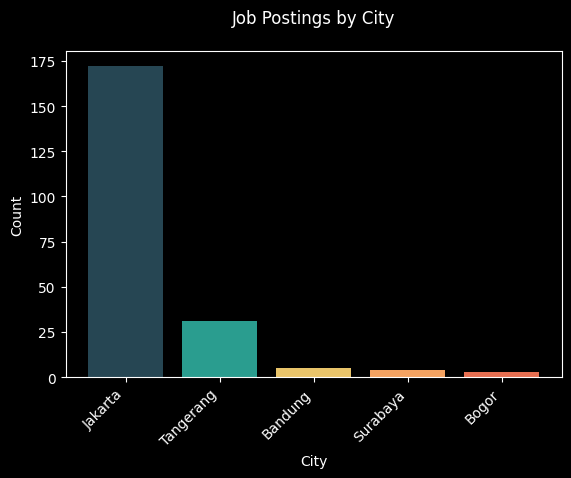

<Figure size 1000x600 with 0 Axes>

In [134]:
df_1 = df.copy()

# Replace values in 'Location' column with 'Jakarta' if they match any value in 'kota_ubah' for Jakarta
kota_ubah_jkt = df_1[df_1['Location'].str.contains('jakarta', case=False)]
replace_dict_jkt = {k: 'Jakarta' for k in kota_ubah_jkt['Location'].unique()}
df_1['Location'] = df_1['Location'].replace(replace_dict_jkt)

# Replace values in 'Location' column with 'Tangerang' if they match any value in 'kota_ubah' for Tangerang
kota_ubah_tgr = df_1[df_1['Location'].str.contains('tangerang', case=False)]
replace_dict_tgr = {k: 'Tangerang' for k in kota_ubah_tgr['Location'].unique()}
df_1['Location'] = df_1['Location'].replace(replace_dict_tgr)

# Sort and count the values in the 'Location' column
city_dict = df_1['Location'].sort_values(ascending=False).value_counts().head()

# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)
# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')
# membuat diagram batang
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.bar(city_dict.index, city_dict.values, color=colors)
# menambahkan label sumbu x dan y
plt.xlabel('City')
plt.ylabel('Count')
# menambahkan judul diagram
plt.title('Job Postings by City', pad=20)
#Merubah Backrground
plt.style.use('dark_background')
plt.figure(facecolor='grey',figsize=(10, 6))
# menampilkan diagram
plt.show()

Terlihat dari Diagram yang ditampilkan kalau Kota Jakarta masih merupakan Lokasi yang tinggi untuk mencari pekerjaan. Namun perlu diperhatikan data ini hanya terdiri dari 148 yang diambil dari www.kalibrr.id untuk lowongan bedasarkan kata kunci "Data" dan tidak mewakili dari seluruh indonesia. Untuk Perusahaan yang sering melakukan Posting lowongan perkerjaan bedasarkan kata kunci tersebut adalah sebagai berikut :

In [137]:
# Ubah nilai pada kolom tertentu
df_2 = df.copy()

df_2['Location'] = df_2['Location'].apply(pre_text)
df_2['Location'] = df_2['Location'].replace(['central jakarta','south jakarta','east jakarta', 'west jakarta', 'north jakarta'], \
                                          ['jakarta pusat','jakarta selatan','jakarta timur', 'jakarta barat', 'jakarta utara']).str.title()


df_2['Location'] = df_2['Location'].apply(pre_text)
df_2['Location'] = df_2['Location'].replace(['central tangerang','south tangerang','east tangerang', 'west tangerang', 'north tangerang'], \
                                          ['tangerang pusat','tangerang selatan','tangerang timur', 'tangerang barat', 'tangerang utara']).str.title()


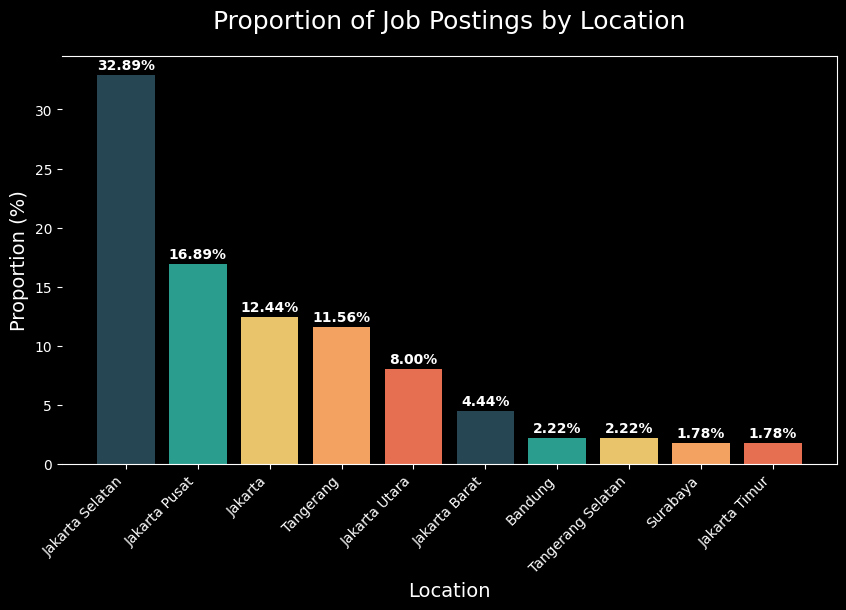

In [138]:
# Tampilkan hasil

top_city_dict = df_2['Location'].sort_values(ascending=False)
top_city_dict = top_city_dict.value_counts(normalize=True).head(10)
top_city_dict = top_city_dict.apply(lambda x: round(x * 100, 2))

# membuat diagram pie dari proporsi kota
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.pie(top_city_dict, labels=top_city_dict.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 10})
# ax.axis('equal')
# ax.set_title('Proporsi Kota')
# plt.show()

# membuat diagram batang
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
ax.bar(top_city_dict.index, top_city_dict.values, color=colors)
# menambahkan label sumbu x dan y
ax.set_xlabel('Location', fontsize=14)
ax.set_ylabel('Proportion (%)', fontsize=14)
# menambahkan judul diagram
ax.set_title('Proportion of Job Postings by Location', fontsize=18, pad=20)
# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)
# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')
# menyembunyikan garis sumbu y
ax.spines['left'].set_visible(False)
# menambahkan nilai proporsi pada setiap batang
for i, v in enumerate(top_city_dict.values):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', fontsize=10, fontweight='bold')
plt.show()


Bedasarkan data yang ditampilkan maka urutan Lowongan pekerjaan untuk "Data" bedasarkan lokasi yang ditampilkan adalah :

1. Jakarta Selatan
2. Jakarta Pusat
3. Tanggerang
4. Jakarta
5. Jakarta Utara
6. Jakarta Barat
7. Surabaya
8. Jakata Timur
9. Bogor
10. Bandung

Namun untuk melihat perbandingan jika Kota Jakarta dijadikan satu adalah :

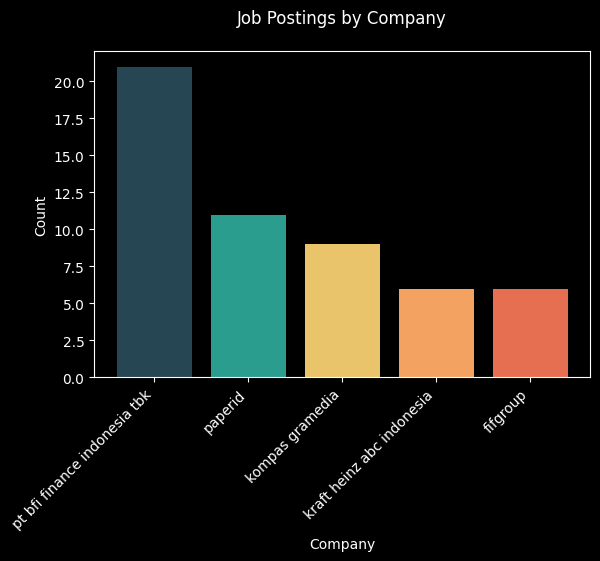

<Figure size 1000x600 with 0 Axes>

In [140]:
company = df['Company'].sort_values(ascending=False).value_counts().head()
# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)
# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')
# membuat diagram batang
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.bar(company.index, company.values, color=colors)
# menambahkan label sumbu x dan y
plt.xlabel('Company')
plt.ylabel('Count')
# menambahkan judul diagram
plt.title('Job Postings by Company', pad=20)
#Merubah Backrground
plt.style.use('dark_background')
plt.figure(facecolor='grey',figsize=(10, 6))
# menampilkan diagram
plt.show()

In [313]:

# fungsi untuk mengubah nilai menjadi timedelta jika dapat diubah
def to_timedelta(val):
    try:
        return pd.Timedelta(val)
    except:
        pass
    try:
        if 'years' in val:
            val = val.replace('years', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'year' in val:
            val = val.replace('year', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'months' in val:
            val = val.replace('months', '').strip()
            return int(val) * pd.Timedelta(days=30)
        if 'days' in val:
            val = val.replace('days', '').strip()
            return pd.Timedelta(days=int(val))
        if 'month' in val:
            return pd.Timedelta(days=30)
        if 'day' in val:
            return pd.Timedelta(days=1)
        # if 'hours' in val:
        #     return pd.Timedelta(days=1)
        if 'minute' in val:
            val = val.replace('minute', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'minutes' in val:
            val = val.replace('minutes', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hour' in val:
            val = val.replace('an', '1').replace('hour', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hours' in val:
            val = val.replace('hours', '').strip()
            return pd.Timedelta(minutes=int(val))
    except:
        pass
    return np.nan

now = pd.Timestamp.now()
# konversi kolom posted_date menjadi timedelta
df['Posted_Date'] = df['Published_At'].apply(to_timedelta)
df['Posted_Date'] = now - df['Posted_Date']
df['Posted_Date']
df['Posted_Date'] = df['Posted_Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
df['Posted_Date'] = pd.to_datetime(df['Posted_Date'], format='%d-%m-%Y')


In [314]:
df.head()

,Company,Title,Location,Published_At,Application_Deadline,Posted_Date
0,paninbank,mis data analytics,Jakarta Pusat,2 days,11 May,2023-05-05
1,pt panin daiichi life bancassurance,bancassurance oficer area pluit cengkareng bek...,North Jakarta,2 days,3 Jul,2023-05-05
2,pt mobilitas digital indonesia,b2b commercial sales account,East Jakarta,2 days,4 Jun,2023-05-05
3,ati business group,corporate it leader,Central Jakarta,2 days,3 Jul,2023-05-05
4,schoters,data analyst,South Jakarta,2 days,3 Jul,2023-05-05


In [318]:
df[['Published_At','Posted_Date']].value_counts()

Published_At  Posted_Date
a month       2023-04-07     67
2 months      2023-03-08     38
5 days        2023-05-02     16
25 days       2023-04-12     14
4 days        2023-05-03     10
3 days        2023-05-04     10
10 days       2023-04-27     10
20 days       2023-04-17      9
19 days       2023-04-18      9
23 days       2023-04-14      9
24 days       2023-04-13      8
12 days       2023-04-25      7
2 days        2023-05-05      6
11 days       2023-04-26      4
9 days        2023-04-28      3
3 months      2023-02-06      2
17 days       2023-04-20      2
18 days       2023-04-19      1
Name: count, dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               225 non-null    object
 1   Title                 225 non-null    object
 2   Location              225 non-null    object
 3   Published_At          225 non-null    object
 4   Application_Deadline  225 non-null    object
dtypes: object(5)
memory usage: 8.9+ KB


In [320]:
df[df['Posted_Date'].dt.year == 2022][['Application_Deadline','Posted_Date']]

,Application_Deadline,Posted_Date


In [321]:
month_dict = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}
df['Application_Deadline'] = df['Application_Deadline'].apply(lambda x: ' '.join([month_dict[i] if i in month_dict else i for i in x.split()]))
df['Deadline_Date'] = df['Application_Deadline'].apply(lambda x: x + ' 2023')
df['Deadline_Date'] = pd.to_datetime(df['Deadline_Date'], format='%d %B %Y')

In [322]:
df[['Deadline_Date']].value_counts()

Deadline_Date
2023-05-30       34
2023-06-29       15
2023-05-29       11
2023-12-30        9
2023-06-11        8
                 ..
2023-05-15        1
2023-06-03        1
2023-07-09        1
2023-07-10        1
2023-03-17        1
Name: count, Length: 74, dtype: int64

In [332]:
df

,Company,Title,Location,Published_At,Application_Deadline,Posted_Date,Deadline_Date
0,paninbank,mis data analytics,Jakarta Pusat,2 days,11 May,2023-05-05,2023-05-11
1,pt panin daiichi life bancassurance,bancassurance oficer area pluit cengkareng bek...,North Jakarta,2 days,3 July,2023-05-05,2023-07-03
2,pt mobilitas digital indonesia,b2b commercial sales account,East Jakarta,2 days,4 June,2023-05-05,2023-06-04
3,ati business group,corporate it leader,Central Jakarta,2 days,3 July,2023-05-05,2023-07-03
4,schoters,data analyst,South Jakarta,2 days,3 July,2023-05-05,2023-07-03
...,...,...,...,...,...,...,...
220,ntt indonesia technology,etl consultant,South Jakarta,2 months,30 May,2023-03-08,2023-05-30
221,pt berlian sistem informasi,it product management,Jakarta Timur,2 months,19 September,2023-03-08,2023-09-19
222,pt sinar mas digital ventures,operations lead,Bekasi,2 months,22 May,2023-03-08,2023-05-22
223,pt bfi finance indonesia tbk,bfi finance x arkavidia data engineer,Tangerang,3 months,30 December,2023-02-06,2023-12-30


Dari data diatas menunjukan masih terdapat data yang belum bersih dimana nama kota masih menujukan data yang tidak valid dan dari data 10 besar yang tampilkan hanya terdapat 2 kota yang muncul yaitu Jakarta dan Tangerang. Untuk itu saya akan bersihkan menjadi nama kota seutuhnya